In [1]:
%matplotlib inline

In [2]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

In [3]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = 'training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
training_idx = np.random.randint(4,64,10)
print(training_idx)

[10 42 53 10 53 52 12 33 37 31]


In [4]:
for idx in training_idx:
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(idx)+"bit"+j+'.csv'
        filename2 = "cla_"+str(idx)+"bit"+j+'.csv'
        filename3 = "csa_"+str(idx)+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(idx)+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])





for i in labels:
    i[0] = int(i[0])

print(labels)
# A dataset with 80 samples, each graph is
# of size [10, 20]
#dataset = MiniGCDataset(80, 10, 20)
#print(dataset[0])

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3]]


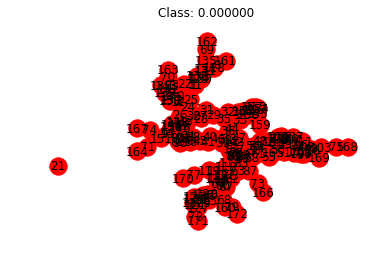

In [5]:
graph = trainset[1]
label=labels[1][0]

fig, ax = plt.subplots()
G=graph.to_networkx()
pos=nx.spring_layout(G)
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos, ax=ax)
ax.set_title('Class: {:f}'.format(label))
plt.show()

### Apply random shuffle to training set

In [6]:
##apply random shuffle on the trainset    
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [7]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [8]:
import dgl.function as fn
import torch
import torch.nn as nn


# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

Readout and classification
--------------------------
For this demonstration, consider initial node features to be their degrees.
After two rounds of graph convolution, perform a graph readout by averaging
over all node features for each graph in the batch.

\begin{align}h_g=\frac{1}{|\mathcal{V}|}\sum_{v\in\mathcal{V}}h_{v}\end{align}

In DGL, :func:`dgl.mean_nodes` handles this task for a batch of
graphs with variable size. You then feed the graph representations into a
classifier with one linear layer to obtain pre-softmax logits.



In [9]:
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float().cuda()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

Setup and training
------------------
Create a synthetic dataset of $400$ graphs with $10$ ~
$20$ nodes. $320$ graphs constitute a training set and
$80$ graphs constitute a test set.



In [10]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Create training and test sets.
# trainset = MiniGCDataset(320, 10, 20)
# testset = MiniGCDataset(80, 10, 20)
#print(trainset)

In [11]:
# Use PyTorch's DataLoader and the collate function
# defined before.
#data_loader = DataLoader(trainset, batch_size=2, shuffle=True,
#                         collate_fn=collate)
#print(data_loader)
# Create model
#model = Classifier(1, 256, trainset.num_classes)
model = Classifier(1, 32, 4)
model.cuda()
loss_func = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

labels_shuffled = torch.LongTensor(labels_shuffled).cuda()

epoch_losses = []
for epoch in range(150):
    model.train()
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,4,dtype=torch.float64).cuda()
        prediction[0] = model(bg)

        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)
    
    if (epoch%5==0):
        model.eval()
        eval_bg = dgl.batch(trainset_shuffled)
        eval_labels = torch.tensor(labels_shuffled).float().view(-1, 1)
        probs_Y = torch.softmax(model(eval_bg), 1)
        argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

        print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
            (eval_labels == argmax_Y.float()).sum().item() / len(eval_labels) * 100))

Epoch 0, loss 1.4681
Accuracy of argmax predictions on the test set: 25.000000%


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 1, loss 1.4070
Epoch 2, loss 1.3985
Epoch 3, loss 1.3965
Epoch 4, loss 1.3955
Epoch 5, loss 1.3946
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 6, loss 1.3937
Epoch 7, loss 1.3927
Epoch 8, loss 1.3928
Epoch 9, loss 1.3913
Epoch 10, loss 1.3896
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 11, loss 1.3885
Epoch 12, loss 1.3875
Epoch 13, loss 1.3864
Epoch 14, loss 1.3848
Epoch 15, loss 1.3870
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 16, loss 1.3775
Epoch 17, loss 1.3822
Epoch 18, loss 1.3760
Epoch 19, loss 1.3717
Epoch 20, loss 1.3684
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 21, loss 1.3650
Epoch 22, loss 1.3617
Epoch 23, loss 1.3583
Epoch 24, loss 1.3548
Epoch 25, loss 1.3513
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 26, loss 1.3476
Epoch 27, loss 1.3439
Epoch 28, loss 1.3399
Epoch 29, loss 1.3359
Epoch 30, loss 1.3317
Accuracy of argmax predictions on the test set: 50.000

The learning curve of a run is presented below.



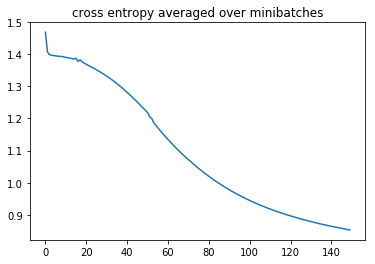

In [12]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

The trained model is evaluated on the test set created. To deploy
the tutorial, restrict the running time to get a higher
accuracy ($80$ % ~ $90$ %) than the ones printed below.



In [13]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([32, 1])
torch.Size([32, 32])


torch.Size([4, 32])

### Get Testset data

In [14]:
testset = []
test_labels = []
test_dir = 'test_data'

testing_idx=[]
for i in range(4,65):
    if i not in training_idx:
        testing_idx.append(i)

print(testing_idx)
print(training_idx)

[4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[10 42 53 10 53 52 12 33 37 31]


In [15]:
for idx in testing_idx:
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(idx)+"bit"+j+'.csv'
        filename2 = "cla_"+str(idx)+"bit"+j+'.csv'
        filename3 = "csa_"+str(idx)+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(idx)+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    testset.append(g2)
    test_labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    testset.append(g3)
    test_labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    testset.append(g4)
    test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

print(test_labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3],

In [16]:
##apply random shuffle on the testset    
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

In [17]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()
probs_Y = torch.softmax(model(test_bg), 1)


sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_labels == argmax_Y.float()).sum().item() / len(test_labels) * 100))

Accuracy of sampled predictions on the test set: 50.0000%
Accuracy of argmax predictions on the test set: 72.169811%


In [18]:
zip(model(test_bg),(test_labels))
for i1,i2 in zip(probs_Y,(test_labels)):
    argmax_Y = torch.max(i1).view(-1, 1)
    print(argmax_Y)
    print(i1,i2)
# print(torch.max(probs_Y, 1))

tensor([[0.3718]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.3263, 0.3718, 0.0123, 0.2897], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([[0.3577]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.2908, 0.3026, 0.0490, 0.3577], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([[0.3321]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.3075, 0.3320, 0.0285, 0.3321], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([[0.3508]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.2954, 0.3117, 0.0422, 0.3508], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([[0.3422]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.2995, 0.3228, 0.0355, 0.3422], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([[0.3493]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.2962, 0.3136, 0.0409, 0.3

In [19]:
import tsne

#m = trainset[0].adjacency_matrix()
m = model(test_bg).cpu().data.numpy()


In [20]:
Y = tsne.tsne(m, 2, 30)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 212...
Mean value of sigma: 0.267737
Iteration 10: error is 10.040139
Iteration 20: error is 8.200225
Iteration 30: error is 8.390629
Iteration 40: error is 8.099303
Iteration 50: error is 8.334499
Iteration 60: error is 8.282623
Iteration 70: error is 8.431041
Iteration 80: error is 8.371101
Iteration 90: error is 8.373718
Iteration 100: error is 8.520083
Iteration 110: error is 0.830205
Iteration 120: error is 0.344059
Iteration 130: error is 0.174385
Iteration 140: error is 0.112452
Iteration 150: error is 0.096832
Iteration 160: error is 0.090852
Iteration 170: error is 0.088846
Iteration 180: error is 0.087136
Iteration 190: error is 0.085147
Iteration 200: error is 0.083080
Iteration 210: error is 0.081522
Iteration 220: error is 0.080418
Iteration 230: error is 0.079466
Iteration 240: error is 0.078662
Iteration 250: error is 0.078060
Iteration 260: error is 0.077541
Iteration 2

In [21]:
print(Y)

[[ 23.7171956    1.59335489]
 [ -7.00138269  13.55388291]
 [-15.28553759   8.13704139]
 [ -9.15714626  11.90961408]
 [-12.15282646  10.08601182]
 [ -9.70601208  11.57677313]
 [ -2.11741282 -19.87773672]
 [-17.66371281   6.62048402]
 [-10.33902366  11.19225638]
 [ 24.64476684   1.33857007]
 [-12.15282724  10.08601134]
 [ 26.34026596   2.33917686]
 [ -1.32764158 -23.07486433]
 [ -1.60993622 -22.2596178 ]
 [ -1.78370539 -21.70707292]
 [ 27.94834072   2.86320339]
 [ 25.28113066   1.81535071]
 [-12.50034111   9.86914023]
 [ 22.91765249   0.9840216 ]
 [ -8.66041664  12.21055404]
 [ 26.96742148   2.56757335]
 [ 28.01100937   5.44830993]
 [ 23.91213469   1.1159267 ]
 [ -8.66040455  12.21056084]
 [-19.3126155    6.0396524 ]
 [ 23.9832335    1.86885764]
 [ -7.239052    13.34789364]
 [-14.31825685   8.74441543]
 [-13.42957786   9.16309672]
 [-18.91692967   5.45699973]
 [ 27.27794725   2.69157309]
 [-18.04223856   6.47833421]
 [-11.14453229  10.70182098]
 [ 24.24119195   1.90348178]
 [ 24.36031782

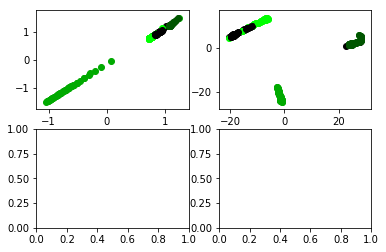

In [22]:
fig, axs = plt.subplots(2,2)


color = test_labels.cpu()*85/255
for i in range (len(test_labels)):
    axs[0,0].scatter(m[i,0],m[i,1],color=(0,color[i],0))
    axs[0,1].scatter(Y[i,0],Y[i,1],color=(0,color[i],0))
    

    
plt.show()